# Assignment1
     Clayton Cohn
     April 2, 2020
     DSC478
     Prof. Mobasher

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATA_PATH = '/Users/claytoncohn/Dropbox/New/DePaul/DSC478/data/bank_data.csv'

In [3]:
df = pd.read_csv(DATA_PATH, delimiter=',')

In [4]:
df.dtypes

id               object
age               int64
income          float64
children          int64
gender           object
region           object
married          object
car              object
savings_acct     object
current_acct     object
mortgage         object
pep              object
dtype: object

In [5]:
df.head(5)

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


1. Explore the general characteristics of the data as a whole: examine the __means__, __standard deviations__, and __other statistics__ associated with the numerical attributes; also __show the distributions of values__ associated with categorical attributes

In [6]:
# means
print("Means:")
print(df[["age","income","children"]].mean())
print("\n")

#standard deviations
print("\nStandard deviations:")
print(df[["age","income","children"]].std())
print("\n")

#description
print("Description:")
print(df[["age","income","children"]].describe())
print("\n")

#correlation matrix
print("Correlation:")
print(df[["age","income","children"]].corr())

Means:
age            42.395000
income      27524.031217
children        1.011667
dtype: float64



Standard deviations:
age            14.424947
income      12899.468246
children        1.056752
dtype: float64


Description:
              age        income    children
count  600.000000    600.000000  600.000000
mean    42.395000  27524.031217    1.011667
std     14.424947  12899.468246    1.056752
min     18.000000   5014.210000    0.000000
25%     30.000000  17264.500000    0.000000
50%     42.000000  24925.300000    1.000000
75%     55.250000  36172.675000    2.000000
max     67.000000  63130.100000    3.000000


Correlation:
               age    income  children
age       1.000000  0.752726  0.023572
income    0.752726  1.000000  0.036761
children  0.023572  0.036761  1.000000


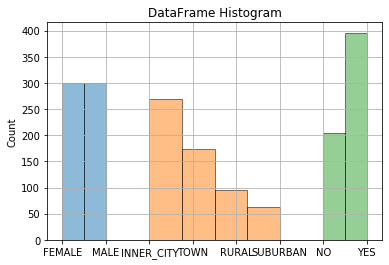

In [7]:
# categorical attributes - gender
plt.hist(df["gender"], bins=2, alpha=0.5, histtype='bar', ec='black')
plt.ylabel('Count')
plt.title('DataFrame Histogram')
plt.grid(True)

# categorical attributes - region
plt.hist(df["region"], bins=4, alpha=0.5, histtype='bar', ec='black')
plt.ylabel('Count')
plt.grid(True)

# categorical attributes - married
plt.hist(df["married"], bins=2, alpha=0.5, histtype='bar', ec='black')
plt.ylabel('Count')
plt.grid(True)

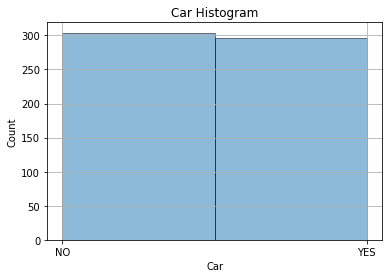

In [8]:
# categorical attributes - car
plt.hist(df["car"], bins=2, alpha=0.5, histtype='bar', ec='black')
plt.xlabel('Car')
plt.ylabel('Count')
plt.title('Car Histogram')
plt.grid(True)

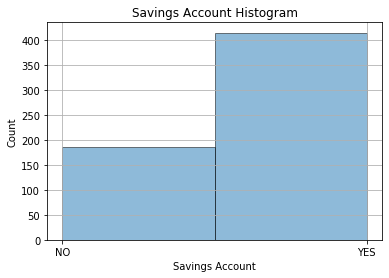

In [9]:
# categorical attributes - savings_acct
plt.hist(df["savings_acct"], bins=2, alpha=0.5, histtype='bar', ec='black')
plt.xlabel('Savings Account')
plt.ylabel('Count')
plt.title('Savings Account Histogram')
plt.grid(True)

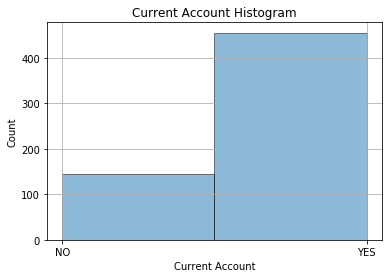

In [10]:
# categorical attributes - current_acct
plt.hist(df["current_acct"], bins=2, alpha=0.5, histtype='bar', ec='black')
plt.xlabel('Current Account')
plt.ylabel('Count')
plt.title('Current Account Histogram')
plt.grid(True)

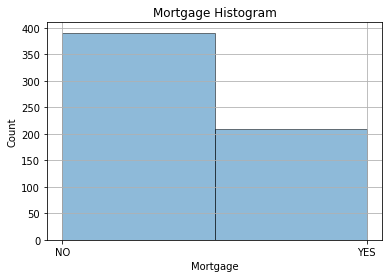

In [11]:
# categorical attributes - mortgage
plt.hist(df["mortgage"], bins=2, alpha=0.5, histtype='bar', ec='black')
plt.xlabel('Mortgage')
plt.ylabel('Count')
plt.title('Mortgage Histogram')
plt.grid(True)

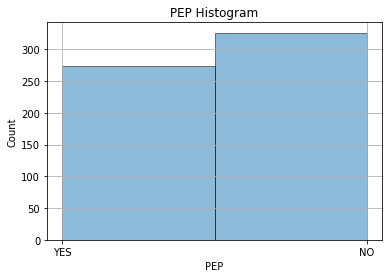

In [12]:
# categorical attributes - pep
plt.hist(df["pep"], bins=2, alpha=0.5, histtype='bar', ec='black')
plt.xlabel('PEP')
plt.ylabel('Count')
plt.title('PEP Histogram')
plt.grid(True)

2. Suppose that the hypothetical bank is particularly interested in customers who buy the PEP (Personal Equity Plan) product. __Compare and contrast the subsets of customers who buy and don't buy the PEP. Compute summaries (as in part 1) of the selected data with respect to all other attributes (you do not need to plot distributions).__ Can you observe any significant differences between these segments of customers? Discuss your observations.

In [13]:
# Before starting this, I am going to convert all of the binary categories to binary representations
d = {'NO': 0, 'YES': 1}

df['married'] = df['married'].map(d).fillna(df['married'])
df['car'] = df['car'].map(d).fillna(df['car'])
df['savings_acct'] = df['savings_acct'].map(d).fillna(df['savings_acct'])
df['current_acct'] = df['current_acct'].map(d).fillna(df['current_acct'])
df['mortgage'] = df['mortgage'].map(d).fillna(df['mortgage'])
df['pep'] = df['pep'].map(d).fillna(df['pep'])

d = {'FEMALE': 0, 'MALE': 1}
df['gender'] = df['gender'].map(d).fillna(df['gender'])

df.head(5)

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.0,1,0,INNER_CITY,0,0,0,0,0,1
1,ID12102,40,30085.1,3,1,TOWN,1,1,0,1,1,0
2,ID12103,51,16575.4,0,0,INNER_CITY,1,1,1,1,0,0
3,ID12104,23,20375.4,3,0,TOWN,1,0,0,1,0,0
4,ID12105,57,50576.3,0,0,RURAL,1,0,1,0,0,0


In [14]:
pep = df.loc[df['pep'] == 1]
no_pep = df.loc[df['pep'] == 0]

In [15]:
print("PEP:")
print(pep[["age","income","children","married","car","savings_acct","current_acct","mortgage","pep"]].describe())
print("\n")

print("NO PEP:")
print(no_pep[["age","income","children","married","car","savings_acct","current_acct","mortgage","pep"]].describe())
print("\n")

PEP:
              age        income    children     married         car  \
count  274.000000    274.000000  274.000000  274.000000  274.000000   
mean    45.127737  30644.919453    0.945255    0.562044    0.503650   
std     14.327991  13609.613043    0.860571    0.497043    0.500902   
min     18.000000   7756.360000    0.000000    0.000000    0.000000   
25%     34.000000  19639.475000    0.000000    0.000000    0.000000   
50%     45.000000  28080.050000    1.000000    1.000000    1.000000   
75%     58.000000  38458.350000    1.000000    1.000000    1.000000   
max     67.000000  63130.100000    3.000000    1.000000    1.000000   

       savings_acct  current_acct    mortgage    pep  
count    274.000000    274.000000  274.000000  274.0  
mean       0.653285      0.770073    0.335766    1.0  
std        0.476795      0.421556    0.473122    0.0  
min        0.000000      0.000000    0.000000    1.0  
25%        0.000000      1.000000    0.000000    1.0  
50%        1.000000      

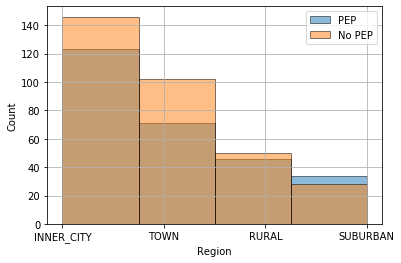

In [16]:
# Region 
plt.hist(pep["region"], bins=4, alpha=0.5, histtype='bar', ec='black')
plt.ylabel('Count')
plt.xlabel('Region')
plt.grid(True)

plt.hist(no_pep["region"], bins=4, alpha=0.5, histtype='bar', ec='black')
plt.ylabel('Count')
plt.legend(["PEP","No PEP"])
plt.grid(True)

Comparing those customers who opted for a PEP and those who didn't, we notice a few things:
- Those who opted for the PEP were typically older and had greater incomes than those who didn't
- Those who chose to forgo the PEP were more likely to be married
- Those who chose to forgo the PEP were more likely to have savings accounts

There was some slight deviation amongst the other categories, but the aforementioned ones represent the biggest differences between sets.

3. __Use z-score normalization__ to standardize the values of the income attribute. [Do not change the original income attribute in the table.]

In [21]:
df['income_zscore'] = (df.income-df.income.mean()) / df.income.std()
df.sample(10)

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep,income_zscore
51,ID12152,36,23894.8,0,1,TOWN,1,0,0,0,0,0,-0.281347
124,ID12225,47,45031.9,3,1,RURAL,0,1,1,0,0,1,1.357255
452,ID12553,59,27045.1,0,0,INNER_CITY,0,0,0,1,0,1,-0.037128
39,ID12140,66,25391.5,2,0,SUBURBAN,0,0,0,1,0,0,-0.165319
21,ID12122,50,16497.3,2,1,TOWN,1,0,1,1,0,0,-0.854821
405,ID12506,47,36599.0,3,1,SUBURBAN,1,1,1,1,0,1,0.703515
263,ID12364,60,46358.4,0,0,INNER_CITY,1,1,1,1,1,0,1.460089
301,ID12402,37,15349.6,0,0,TOWN,1,0,1,0,0,0,-0.943793
67,ID12168,41,34892.9,0,0,TOWN,0,0,1,1,1,0,0.571254
573,ID12674,39,22400.7,2,1,TOWN,1,1,1,1,0,0,-0.397174


4. __Discretize the age attribute into 3 categories__ (corresponding to "young", "mid-age", and "old"). [Do not change the original age attribute in the table.]

In [31]:
df['age_descret'] = pd.cut(x = df['age'],
                        bins = [18,30,50,68], 
                        labels = ['YOUNG', 'MID-AGE', 'OLD'])
df.sample(10)

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep,income_zscore,age_descret
432,ID12533,46,16849.3,0,1,TOWN,0,1,1,1,1,0,-0.827533,MID-AGE
58,ID12159,29,15143.8,0,0,INNER_CITY,1,0,0,1,0,0,-0.959747,YOUNG
507,ID12608,22,11595.4,0,0,SUBURBAN,0,1,1,1,0,1,-1.234829,YOUNG
484,ID12585,28,21184.7,1,0,INNER_CITY,1,1,1,1,0,1,-0.491441,YOUNG
240,ID12341,26,11299.3,2,0,RURAL,1,1,0,0,0,0,-1.257783,YOUNG
29,ID12130,61,24270.1,1,1,RURAL,1,0,0,1,0,1,-0.252253,OLD
400,ID12501,34,19481.3,0,0,RURAL,0,0,0,1,1,1,-0.623493,MID-AGE
101,ID12202,27,11604.4,2,0,INNER_CITY,1,1,1,1,0,0,-1.234131,YOUNG
407,ID12508,31,22362.3,0,1,SUBURBAN,0,0,1,1,0,1,-0.400151,MID-AGE
161,ID12262,40,12977.2,0,0,INNER_CITY,1,0,0,0,0,0,-1.127708,MID-AGE
